Compressed notation for LeNet-5

![lenet-vert](../images/lenet-vert.svg)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

### Data

In [2]:
"""
Download the Fashion-MNIST dataset and then load it into memory.
"""

mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
def load_data_fashion_mnist(batch_size, resize=None):
    # Divide all numbers by 255 so that all pixel values are between
    # 0 and 1, add a batch dimension at the last. And cast label to int32
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                            tf.cast(y, dtype='int32'))
    resize_fn = lambda X, y: (
        tf.image.resize_with_pad(X, resize, resize) if resize else X, y)
    return (
        tf.data.Dataset.from_tensor_slices(process(*mnist_train)).batch(
            batch_size).shuffle(len(mnist_train[0])).map(resize_fn),
        tf.data.Dataset.from_tensor_slices(process(*mnist_test)).batch(
            batch_size).map(resize_fn))

In [4]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

### Model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='sigmoid'))
model.add(tf.keras.layers.Dense(84, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10))

In [6]:
train_iter

<MapDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
lr, num_epochs = 0.9, 10

In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

In [10]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [12]:
model.fit(train_iter, epochs=num_epochs)

Epoch 1/10
235/235 [==============================] - 12s 52ms/step - loss: 2.3198 - accuracy: 0.1008
Epoch 2/10
235/235 [==============================] - 13s 53ms/step - loss: 1.8160 - accuracy: 0.2985
Epoch 3/10
235/235 [==============================] - 13s 54ms/step - loss: 0.9065 - accuracy: 0.6413
Epoch 4/10
235/235 [==============================] - 13s 54ms/step - loss: 0.7271 - accuracy: 0.7143
Epoch 5/10
235/235 [==============================] - 13s 55ms/step - loss: 0.6467 - accuracy: 0.7466
Epoch 6/10
235/235 [==============================] - 13s 55ms/step - loss: 0.5952 - accuracy: 0.7710
Epoch 7/10
235/235 [==============================] - 13s 55ms/step - loss: 0.5514 - accuracy: 0.7866
Epoch 8/10
235/235 [==============================] - 14s 59ms/step - loss: 0.5191 - accuracy: 0.8009
Epoch 9/10
235/235 [==============================] - 14s 58ms/step - loss: 0.4899 - accuracy: 0.8144
Epoch 10/10
235/235 [==============================] - 15s 62ms/step - loss: 0.470

In [13]:
model.evaluate(test_iter)

40/40 [==============================] - 1s 30ms/step - loss: 0.4816 - accuracy: 0.8177


[0.4816025495529175, 0.8177000284194946]

### One Prediction

In [14]:
x_test, y_test = mnist_test

In [15]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

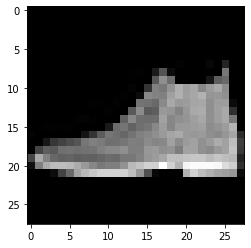

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))

In [17]:
test_one = x_test[0]
test_one

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
test_one.shape

(28, 28)

In [19]:
test_one = test_one / 255
test_one

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
test_one = tf.reshape(test_one, (1, ) + test_one.shape + (1, ))
test_one

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float64, numpy=
array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],

In [21]:
predictions = model.predict(test_one)
predictions

array([[-3.151519 , -3.8183634, -3.2086685, -3.2064767, -1.5823122,
         5.1874614, -4.4742146,  6.0470395,  0.6421392,  8.291014 ]],
      dtype=float32)

In [22]:
import numpy as np

classes = np.argmax(predictions, axis = 1)
print(classes)

[9]


In [23]:
y_test[0]

9